In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [8]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [10]:
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [12]:
customers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [14]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [15]:
customers_df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [16]:
products_df.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [17]:
transactions_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [18]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [19]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [20]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [21]:
customers_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [22]:
products_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [23]:
transactions_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [28]:
merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='left')

In [30]:
final_df = pd.merge(merged_df, customers_df, on='CustomerID', how='left')

In [31]:
final_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')

In [32]:
final_df['Region'].value_counts()

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

# Analyzing Regional Sales Performance

In [90]:
regional_sales = final_df.groupby('Region')['TotalValue'].sum()

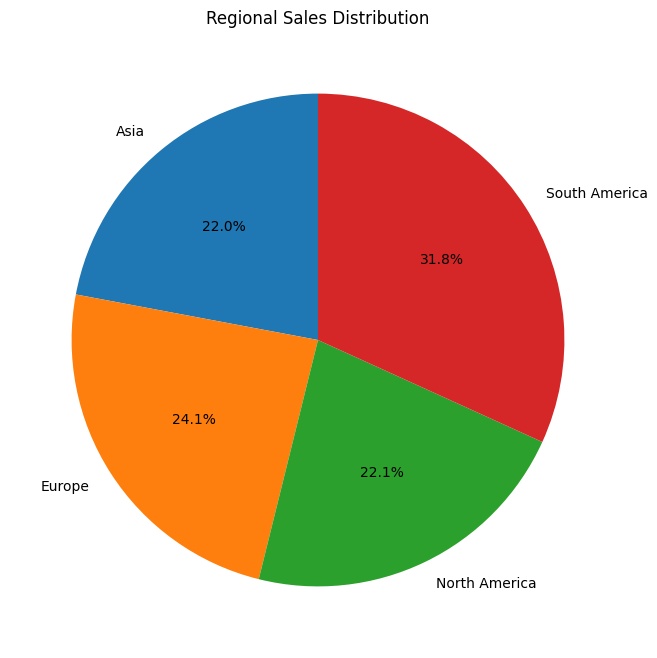

In [94]:
plt.figure(figsize=(10,8))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Regional Sales Distribution")
plt.show()

OBSERVATION: South America has maximum sales, followed by  Europe, North America, and Asia.

In [40]:
final_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')

In [41]:
final_df['ProductID'].value_counts()

ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
        ..
P024     5
P014     4
P031     4
P044     4
P099     4
Name: count, Length: 100, dtype: int64

# Identifying Top-Selling Products and Categories

In [67]:
top_selling_products = final_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_selling_categories = final_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(10)

Plotting the pie chart for top 5 most selling products

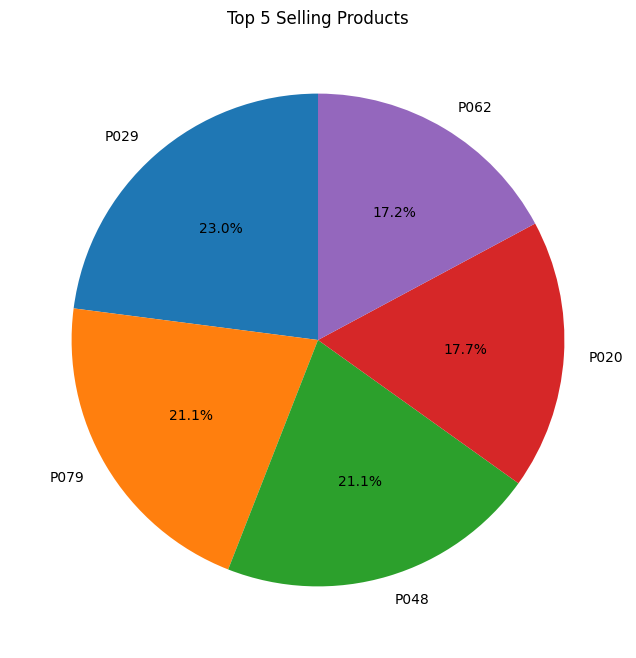

In [96]:
top_products = top_selling_products.head(5)
plt.figure(figsize=(10, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Selling Products")
plt.show()

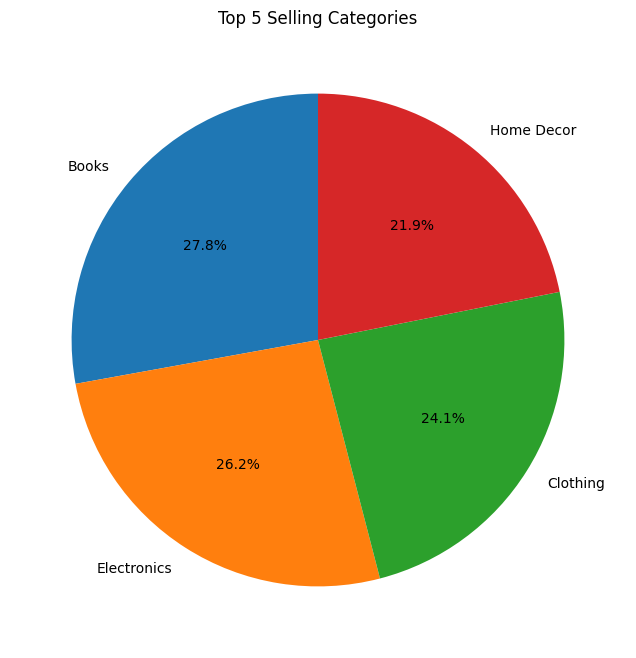

In [98]:
top_categories = top_selling_categories.head(5)
plt.figure(figsize=(10, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Selling Categories")
plt.show()

# Analyzing Customer Purchasing Behavior

In [85]:
customer_avg_order_value = final_df.groupby('CustomerID')['TotalValue'].mean()
customer_purchase_frequency = final_df.groupby('CustomerID')['TransactionID'].count()

In [89]:
print(customer_avg_order_value.sort_values(ascending=False).head())

CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
Name: TotalValue, dtype: float64


In [88]:
print(customer_purchase_frequency.sort_values(ascending=False).head())

CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
Name: TransactionID, dtype: int64


The TOP 5 CUSTOMERS with high average order values have CustomerIDs : C0040, C0089, C0066, C0168, C0196

The TOP 5 CUSTOMERS with high customer purchase frequency have CustomerIDs : C0156, C0109, C0175, C0141, C0065

# Product Cross Selling Opportunities

In [101]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [107]:
def find_product_cross_sell_oppportunities(transactions_df, min_support=0.01, min_threshold=1):
    # Creating a pivot table to represent product combinations
    product_combinations = pd.pivot_table(
        data = transactions_df,
        index = 'CustomerID',
        columns = 'ProductID',
        values = 'Quantity',
        fill_value = 0
    )
    
    #Converting product combinations to binary
    product_combinations = (product_combinations > 0).astype(int)
    
    #Frequent itemsets
    frequent_itemsets = apriori(product_combinations, min_support=min_support, use_colnames=True)
    
    #Generating association rules
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=min_threshold)
    
    return rules.sort_values(by='lift', ascending=False)

cross_sell_rules = find_product_cross_sell_oppportunities(final_df)

print(cross_sell_rules.head(10))

       antecedents   consequents  antecedent support  consequent support  \
1137  (P057, P028)  (P085, P080)            0.010050             0.01005   
1136  (P085, P080)  (P057, P028)            0.010050             0.01005   
1135  (P085, P028)  (P057, P080)            0.010050             0.01005   
1134  (P085, P057)  (P028, P080)            0.010050             0.01005   
1139  (P028, P080)  (P085, P057)            0.010050             0.01005   
1148  (P029, P075)  (P038, P032)            0.010050             0.01005   
1138  (P057, P080)  (P085, P028)            0.010050             0.01005   
1153  (P038, P032)  (P029, P075)            0.010050             0.01005   
1163  (P084, P033)  (P067, P047)            0.015075             0.01005   
1149  (P029, P038)  (P075, P032)            0.015075             0.01005   

      support  confidence       lift  leverage  conviction  zhangs_metric  
1137  0.01005    1.000000  99.500000  0.009949         inf            1.0  
1136  0.010

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


CONCLUSION: 
Strong Associations:
1) High lift values - indicating strong association between the antecedent and consequent products.
2) High confidence - Most rules have confidence of 1.0, meaning that whenever the antecedent products are purchased, the consequent products are also always purchased. 

Potential Cross-Selling Opportunities:
Example: 
(P057, P028) => (P085, P080): If a customer buys products P057 and P028 together, they are highly likely to also buy products P085 and P080.

Terms: 
1) Antecedents -  represents the condition or the itemset that is assumed to be true.
2) Consequents - represents the itemset that is predicted to occur given that the antecedent is true.